<a href="https://colab.research.google.com/github/natdebandi/hate_speech_ar/blob/main/2_GPT_evaluate_batch_multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP final - reconocimiento de discursos discriminatorios en Twitter

Esta notebook se usa para recuperar los batch de GPT y evaluarlos en relación a los datos de test para la clasificacion multietiqueta

**Natalia Dedandi**





La documentación de la API se encuentra aqui:

https://platform.openai.com/docs/api-reference/introduction



In [23]:
pip install openai

In [24]:
!pip install datasets seaborn

In [ ]:
import json
from openai import OpenAI
import os
from google.colab import userdata
#seteo la KEY
os.environ['OPENAI_API_KEY'] = userdata.get('openIA_key')




In [ ]:
#creo el cliente OPENAI con mi usuario y proyecto
client = OpenAI(
  organization='org-1uHjwiaB3OlPzoxfVzhqOSzs',
  project='proj_2fII7izwVGgYaERNNKhhMx4l',
)


GPT no acepta archivos tan grandes por lo que se dividó la clasificacion en dos partes. Aqui se retoman los dos y se consolidan en un dataframe conjunto

BATCH ID Parte 1: batch_lbqgkIXz96h4G82byrWsKiLf

BATCH ID Parte 2:batch_whoRan66MYdbw5OhNxJqFHhu








In [ ]:
batch_job1 = client.batches.retrieve('batch_lbqgkIXz96h4G82byrWsKiLf')
batch_job1.status


'completed'

In [ ]:
batch_job2 = client.batches.retrieve('batch_whoRan66MYdbw5OhNxJqFHhu')
batch_job2.status


'completed'

In [ ]:
##batch job 1

output_file_id = batch_job1.output_file_id
# We should check that there are succesfull results
	# It could be the case that all responses are errors.
if output_file_id:
	outputs = client.files.content(output_file_id).content
	result_file_name = "outputs1.jsonl"

	with open(result_file_name, 'wb') as file:
	    file.write(outputs)



In [ ]:
import pandas as pd

data_results = []
with open(result_file_name, 'r') as file:
  for line in file:
      output = json.loads(line.strip())
      id=output["custom_id"]
      sentiment= output["response"]["body"]["choices"][0]["message"]["content"]
      data_results.append({'id': id, 'sentiment_gpt': sentiment})
      gpt_response = output["response"]["body"]["choices"][0]["message"]["content"]
      #print(gpt_response)

df_results1 = pd.DataFrame(data_results)

In [ ]:
df_results1[1:10]

,id,sentiment_gpt
1,397704,NOT HATEFUL
2,397705,POLITICS
3,397706,POLITICS
4,397707,NOT HATEFUL
5,397708,POLITICS
6,397709,NOT HATEFUL
7,397710,POLITICS
8,397711,NOT HATEFUL
9,397712,NOT HATEFUL


In [ ]:
##batch job 2

output_file_id = batch_job2.output_file_id
# We should check that there are succesfull results
	# It could be the case that all responses are errors.
if output_file_id:
	outputs = client.files.content(output_file_id).content
	result_file_name = "outputs2.jsonl"

	with open(result_file_name, 'wb') as file:
	    file.write(outputs)

In [ ]:
import pandas as pd

data_results = []
with open(result_file_name, 'r') as file:
  for line in file:
      output = json.loads(line.strip())
      id=output["custom_id"]
      sentiment= output["response"]["body"]["choices"][0]["message"]["content"]
      data_results.append({'id': id, 'sentiment_gpt': sentiment})
      gpt_response = output["response"]["body"]["choices"][0]["message"]["content"]
      #print(gpt_response)

df_results2 = pd.DataFrame(data_results)

In [ ]:
df_results2[1:10]

,id,sentiment_gpt
1,406491,WOMEN
2,406492,WOMEN
3,406493,NOT HATEFUL
4,406494,RACISM
5,406495,LGBTI
6,406496,NOT HATEFUL
7,406497,RACISM
8,406498,RACISM
9,406499,NOT HATEFUL


In [ ]:
len(df_results2)

5671

In [ ]:
df_results["id"] = pd.to_numeric(df_results["id"])

In [ ]:
#df_results.to_csv('outputs_bin_1.csv')

In [ ]:
df_results.groupby(['sentiment_gpt']).size()

sentiment_gpt
APPEARENCE                                                                                                                                     50
APPEARENCE, CRIMINAL                                                                                                                            1
CALLS                                                                                                                                         230
CLASS                                                                                                                                          51
CLASS, CALLS                                                                                                                                    1
CLASS, CRIMINAL                                                                                                                                 3
CLASS, CRIMINAL, CALLS                                                                                        

In [ ]:
import re

def word_in_text(word, text):
    # Use re.search() to find the word in the text
    pattern = r'\b{}\b'.format(re.escape(word))  # \b matches word boundaries
    match = re.search(pattern, text, flags=re.IGNORECASE)  # Ignore case for case-insensitive matching

    if match:
        return True
    else:
        return False

In [ ]:
# ajustar los valores y crear una variable binaria entera 1 y 0
df_results['CALLS_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('calls',x) else 0)
df_results['WOMEN_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('women',x) else 0)
df_results['LGBTI_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('lgbti',x) else 0)
df_results['RACISM_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('racism',x) else 0)
df_results['CLASS_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('class',x) else 0)
df_results['POLITICS_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('politics',x) else 0)
df_results['DISABLED_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('disabled',x) else 0)
df_results['APPEARENCE_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('appearance',x) else 0)
df_results['CRIMINAL_pred'] = df_results['sentiment_gpt'].apply(lambda x: 1 if word_in_text('criminal',x) else 0)

In [ ]:
df_results['HATEFUL_pred']= df_results[['CALLS_pred','WOMEN_pred','LGBTI_pred','RACISM_pred','CLASS_pred','POLITICS_pred','DISABLED_pred','APPEARENCE_pred','CRIMINAL_pred']].max(axis=1)

df_results.groupby(['HATEFUL_pred']).size()

HATEFUL_pred
0    2006
1     830
dtype: int64

In [ ]:
from datasets import load_dataset
import pandas as pd

ds1 = load_dataset("piuba-bigdata/contextualized_hate_speech")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/36420 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11343 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/9106 [00:00<?, ? examples/s]

In [ ]:
df_test = pd.DataFrame(ds1['test'])
df_test[1:10]

,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
1,397704,Mora Godoy cierra su escuela de tango y remata...,@usuario Faltó que se enganchó al hijo de sofo...,Mora Godoy cierra su escuela de tango y remata...,1,Puede marcar con justeza la fecha de inicio de...,0,1,0,0,0,0,0,0,0
2,397705,Mora Godoy cierra su escuela de tango y remata...,"@usuario y bue, que le vaya a llorar a Cristin...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
3,397706,Mora Godoy cierra su escuela de tango y remata...,@usuario @usuario Jodete. Macri te hizo conoce...,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
4,397707,Mora Godoy cierra su escuela de tango y remata...,"@usuario Que se joda, es su gobierno el que el...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
5,397708,Mora Godoy cierra su escuela de tango y remata...,"@usuario Jajaajajajaaja que lástima!!! Anda, b...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
6,397709,Mora Godoy cierra su escuela de tango y remata...,@usuario Que se joda,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
7,397710,Mora Godoy cierra su escuela de tango y remata...,@usuario SEGUI VOTANDO AL PERONISMO PELOTUDA,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
8,397711,Mora Godoy cierra su escuela de tango y remata...,@usuario Paaaaaaaaaaaaabreeeee!_shoro😭😭🤧,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
9,397712,Mora Godoy cierra su escuela de tango y remata...,@usuario TUGO,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0


In [25]:
df_results[0:10]

,id,sentiment_gpt,CALLS_pred,WOMEN_pred,LGBTI_pred,RACISM_pred,CLASS_pred,POLITICS_pred,DISABLED_pred,APPEARENCE_pred,CRIMINAL_pred,HATEFUL_pred
0,397703,CALLS,1,0,0,0,0,0,0,0,0,1
1,397704,NOT HATEFUL,0,0,0,0,0,0,0,0,0,0
2,397705,POLITICS,0,0,0,0,0,1,0,0,0,1
3,397706,POLITICS,0,0,0,0,0,1,0,0,0,1
4,397707,NOT HATEFUL,0,0,0,0,0,0,0,0,0,0
5,397708,POLITICS,0,0,0,0,0,1,0,0,0,1
6,397709,NOT HATEFUL,0,0,0,0,0,0,0,0,0,0
7,397710,POLITICS,0,0,0,0,0,1,0,0,0,1
8,397711,NOT HATEFUL,0,0,0,0,0,0,0,0,0,0
9,397712,NOT HATEFUL,0,0,0,0,0,0,0,0,0,0


In [28]:
len(df_test)

11343

In [29]:
len(df_results)

11342

In [27]:
#junto los dos dataframes
df_hateful=df_test.merge(df_results,how='left', on='id')
df_hateful[1:10]

,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,...,CALLS_pred,WOMEN_pred,LGBTI_pred,RACISM_pred,CLASS_pred,POLITICS_pred,DISABLED_pred,APPEARENCE_pred,CRIMINAL_pred,HATEFUL_pred
1,397704,Mora Godoy cierra su escuela de tango y remata...,@usuario Faltó que se enganchó al hijo de sofo...,Mora Godoy cierra su escuela de tango y remata...,1,Puede marcar con justeza la fecha de inicio de...,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,397705,Mora Godoy cierra su escuela de tango y remata...,"@usuario y bue, que le vaya a llorar a Cristin...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,397706,Mora Godoy cierra su escuela de tango y remata...,@usuario @usuario Jodete. Macri te hizo conoce...,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,397707,Mora Godoy cierra su escuela de tango y remata...,"@usuario Que se joda, es su gobierno el que el...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,397708,Mora Godoy cierra su escuela de tango y remata...,"@usuario Jajaajajajaaja que lástima!!! Anda, b...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,397709,Mora Godoy cierra su escuela de tango y remata...,@usuario Que se joda,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,397710,Mora Godoy cierra su escuela de tango y remata...,@usuario SEGUI VOTANDO AL PERONISMO PELOTUDA,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,397711,Mora Godoy cierra su escuela de tango y remata...,@usuario Paaaaaaaaaaaaabreeeee!_shoro😭😭🤧,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,397712,Mora Godoy cierra su escuela de tango y remata...,@usuario TUGO,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df_hateful.groupby(['HATEFUL_pred']).size()

HATEFUL_pred
0.0    7696
1.0    3646
dtype: int64

In [33]:
df_hateful=df_hateful.fillna(0)

In [35]:
df_hateful['HATEFUL_pred'] = df_hateful['HATEFUL_pred'].astype(int)
df_hateful['CALLS_pred'] = df_hateful['CALLS_pred'].astype(int)
df_hateful['WOMEN_pred'] = df_hateful['WOMEN_pred'].astype(int)
df_hateful['LGBTI_pred'] = df_hateful['LGBTI_pred'].astype(int)
df_hateful['RACISM_pred'] = df_hateful['RACISM_pred'].astype(int)
df_hateful['CLASS_pred'] = df_hateful['CLASS_pred'].astype(int)
df_hateful['POLITICS_pred'] = df_hateful['POLITICS_pred'].astype(int)
df_hateful['DISABLED_pred'] = df_hateful['DISABLED_pred'].astype(int)
df_hateful['APPEARENCE_pred'] = df_hateful['APPEARENCE_pred'].astype(int)
df_hateful['CRIMINAL_pred'] = df_hateful['CRIMINAL_pred'].astype(int)



<ipython-input-22-ed43efad24f9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_hateful, x='HATEFUL', y='HATEFUL_pred', inner='stick', palette='Dark2')


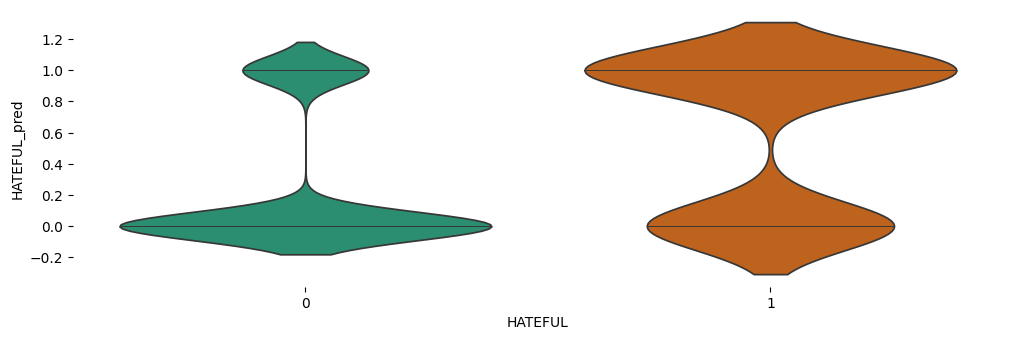

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_hateful['HATEFUL_pred'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_hateful, x='HATEFUL', y='HATEFUL_pred', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def compare_model_predictions(y_true, y_pred):
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
    metrics['f1'] = f1_score(y_true, y_pred, average='weighted')
    metrics['AUC'] = roc_auc_score(y_true, y_pred, average='weighted')
    print(metrics)

In [ ]:
df_hateful.groupby(['HATEFUL']).size()

HATEFUL
0    9546
1    1797
dtype: int64

In [ ]:
compare_model_predictions(df_hateful['HATEFUL'],df_hateful['HATEFUL_pred'])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/multiclass.py:380: RuntimeWarning: invalid value encountered in cast
  if xp.any(data != data.astype(int)):


ValueError: Input y_pred contains NaN.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
from sklearn.preprocessing import MultiLabelBinarizer

# Example data (replace with your actual data)
y_true = [df_multiple['CALLS'], df_multiple['WOMEN'], df_multiple['LGBTI'], df_multiple['RACISM'], df_multiple['CLASS'], df_multiple['POLITICS'], df_multiple['DISABLED'], df_multiple['APPEARANCE'], df_multiple['CRIMINAL']]
y_pred = [df_multiple['CALLS_pred'], df_multiple['WOMEN_pred'], df_multiple['LGBTI_pred'], df_multiple['RACISM_pred'], df_multiple['CLASS_pred'], df_multiple['POLITICS_pred'], df_multiple['DISABLED_pred'], df_multiple['APPEARENCE_pred'], df_multiple['CRIMINAL_pred']]

# Convert labels to binary representation
mlb = MultiLabelBinarizer()
y_true_bin = mlb.fit_transform(y_true)
y_pred_bin = mlb.transform(y_pred)

# Accuracy
accuracy = accuracy_score(y_true_bin, y_pred_bin)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_true_bin, y_pred_bin, average='samples')
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_true_bin, y_pred_bin, average='samples')
print(f'Recall: {recall:.2f}')

# F1 score
f1 = f1_score(y_true_bin, y_pred_bin, average='samples')
print(f'F1 score: {f1:.2f}')

In [ ]:
metrics=compare_model_predictions(df_hateful['HATEFUL'],df_hateful['sentiment_bin'])

{'Accuracy': 0.6448029621793177, 'Precision': 0.8199590663396216, 'Recall': 0.6448029621793178, 'f1': 0.692545465009761, 'AUC': 0.6767150152831716}
